Directorio de ROIs: /home/diego/Escritorio/desde_schaefer100/ROISignals_Schaefer2018_100Parcels_17Networks_NiftiPreprocessedAllBatchesNorm
Archivo CSV de metadatos de sujetos: /home/diego/Escritorio/desde_schaefer100/SubjectsData_Schaefer2018.csv
Directorio de exportación: qc_outputs_schaefer100_v4.0
Columnas esperadas en .mat (Schaefer 100): 100

--- Bloque 0: Carga de metadatos de atlas (Omitido para Schaefer) ---
--- Bloque 0 Completado ---

--- Iniciando Bloque 1: Carga de Metadatos de Sujetos ---
Total de sujetos en CSV: 434
--- Bloque 1 Completado ---

--- Iniciando Bloque 3: QC Inicial por Sujeto ---
Advertencia (Sujeto 002_S_0295): Clave 'ROISignals' no encontrada, usando 'signals'.
Advertencia (Sujeto 002_S_0413): Clave 'ROISignals' no encontrada, usando 'signals'.
Advertencia (Sujeto 002_S_0685): Clave 'ROISignals' no encontrada, usando 'signals'.
Advertencia (Sujeto 002_S_0729): Clave 'ROISignals' no encontrada, usando 'signals'.
Advertencia (Sujeto 002_S_1155): Clave 'ROISi

/home/diego/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/diego/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/diego/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/diego/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

Número de sujetos válidos después del QC inicial: 434
--- Bloque 3 Completado ---

--- Iniciando Bloque 4: Detección de Outliers Univariantes ---

=== Estadísticas Descriptivas de Outliers Univariantes ===
                      count         mean          std         min         25%  \
UnivOutliersCount     434.0    34.774194    36.595469    0.000000   11.000000   
UnivOutliersPct       434.0     0.196549     0.196618    0.000000    0.065990   
MeanOriginalVariance  434.0  1643.996732  2638.816482  233.456082  840.245744   

                              50%          75%           max  
UnivOutliersCount       22.500000    45.750000    320.000000  
UnivOutliersPct          0.128571     0.259721      1.624365  
MeanOriginalVariance  1217.129450  1794.885986  47961.500577  
--- Bloque 4 Completado ---

--- Iniciando Bloque 5: Procesamiento de ROIs y Outliers Multivariantes ---


/home/diego/anaconda3/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/diego/anaconda3/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/diego/anaconda3/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/diego/anaconda3/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/diego/anaconda3/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
/home/diego/anaconda3/lib/python3.1


=== Estadísticas Descriptivas de Outliers Multivariantes ===
                 count       mean        std        min        25%        50%  \
MVOutliersCount  434.0  39.730415  15.526589  19.000000  19.000000  50.000000   
MVOutliersPct    434.0  21.526680   5.978291  13.571429  13.571429  25.380711   

                  75%       max  
MVOutliersCount  52.0  57.00000  
MVOutliersPct    26.0  28.93401  

Conteo de razones por las que se omitió el análisis MV:
MVAnalysisSkipped
None    434
Name: count, dtype: int64

Conteo de métodos de análisis MV usados:
MVAnalysisMethod
MCD    434
Name: count, dtype: int64

Conteo de ROIs usados para análisis MV (para los que se intentó):
ROIs_for_MV
100    434
Name: count, dtype: int64
--- Bloque 5 Completado ---

--- Iniciando Bloque 6: Combinación de Métricas y Visualizaciones Globales ---

Reporte completo guardado en: qc_outputs_schaefer100_v4.0/report_qc_full_compiled_schaefer100.csv
--- Bloque 6 Completado ---

--- Iniciando Bloque 7: Propues

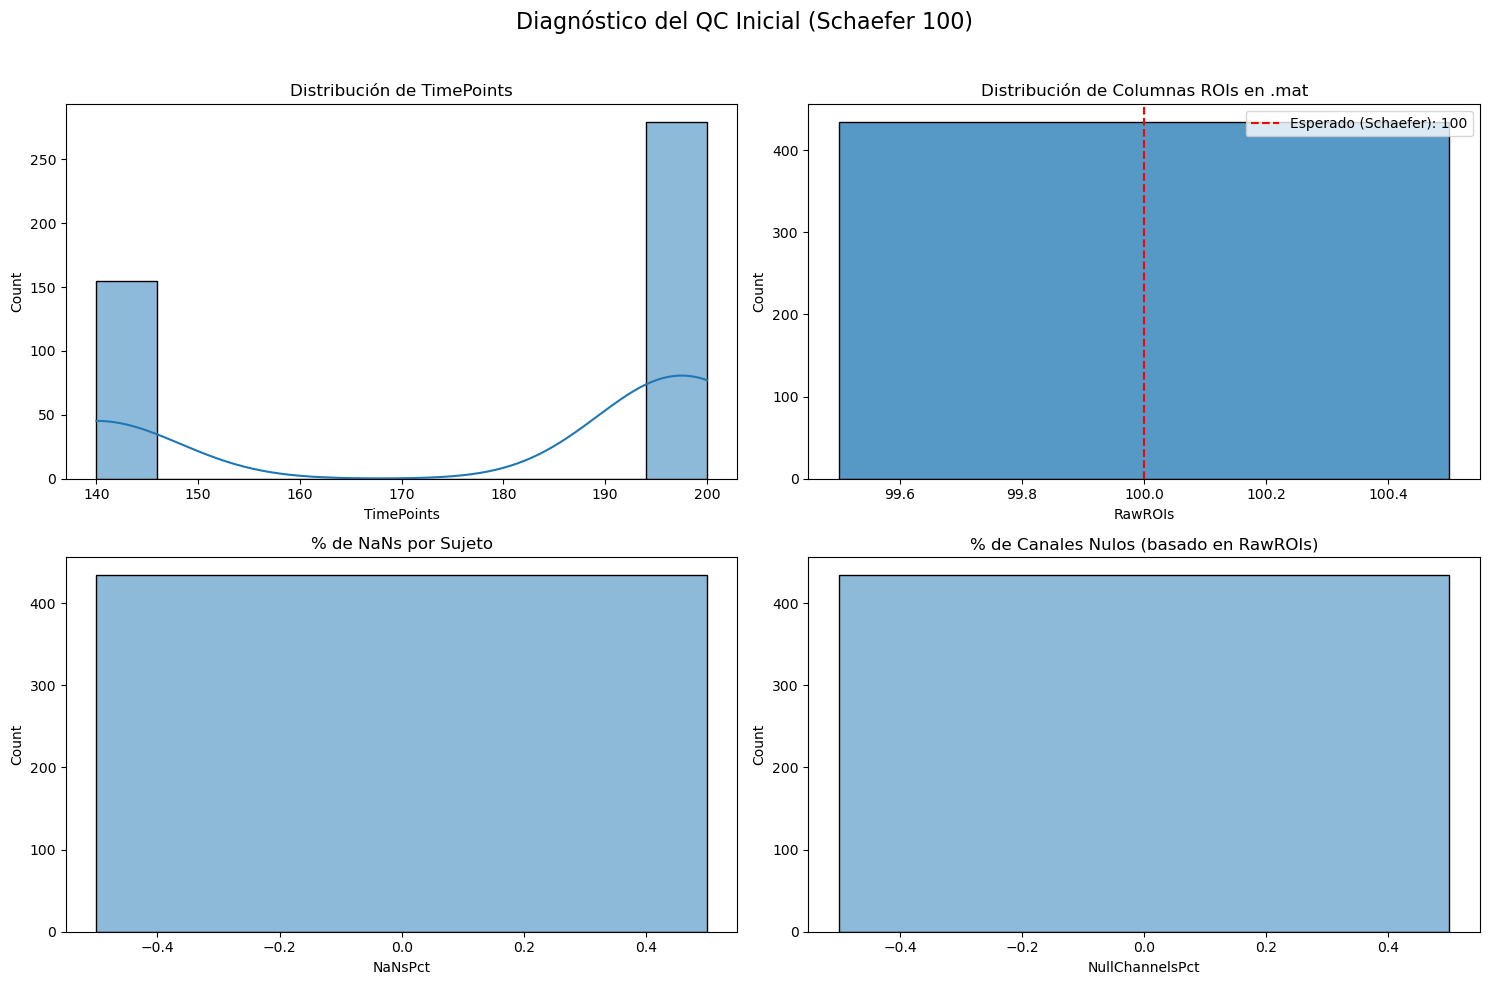

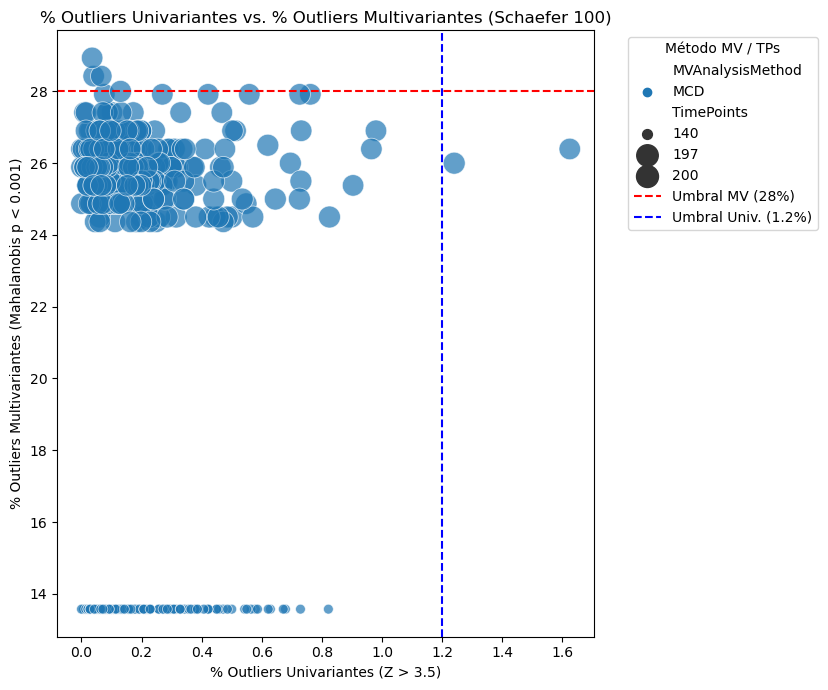

In [1]:
# ANÁLISIS DE OUTLIERS EN SERIES BOLD CON ATLAS SCHAEFER 100 (v4.0)
# Adaptado desde la v3.2 para AAL3
# -------------------------------------------------------------------------------------------------
# Cambios v4.0 (Adaptación para Schaefer 100):
# - Eliminada toda la lógica dependiente del atlas AAL3 (metadatos, exclusión de ROIs).
# - Configuración ajustada para 100 ROIs del atlas Schaefer.
# - Simplificado el bloque de procesamiento de ROIs antes del análisis multivariante.
# - Actualizadas las etiquetas de los gráficos y los reportes.

import os
from pathlib import Path
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, chi2, median_abs_deviation
from sklearn.covariance import MinCovDet, LedoitWolf
from sklearn.impute import SimpleImputer
import warnings
from numpy.linalg import LinAlgError

try:
    from numpy.linalg import LinAlgWarning
except ImportError:
    class LinAlgWarning(Warning): pass

# --- Ignorar UserWarnings (opcional) ---
# warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.covariance._robust_covariance')
# warnings.filterwarnings("ignore", category=RuntimeWarning)

# ---------- CONFIGURACIÓN (ADAPTADA PARA SCHAEFER 100) ----------
ROI_DIR = Path('/home/diego/Escritorio/desde_schaefer100/ROISignals_Schaefer2018_100Parcels_17Networks_NiftiPreprocessedAllBatchesNorm')
CSV_PATH = Path('/home/diego/Escritorio/desde_schaefer100/SubjectsData_Schaefer2018.csv')

# ADAPTADO: El atlas Schaefer 2018 tiene 100 parcelas en esta versión.
RAW_DATA_EXPECTED_COLUMNS = 100

# ELIMINADO: Variables específicas de AAL3 que ya no son necesarias.
# AAL3_META_PATH = Path('/home/diego/Escritorio/AAL3/ROI_MNI_V7_vol.txt')
# AAL3_MISSING_INDICES_1BASED = [35, 36, 81, 82]
# EXPECTED_ROIS_AFTER_AAL3_CLEANUP = RAW_DATA_EXPECTED_COLUMNS - len(AAL3_MISSING_INDICES_1BASED)
# SMALL_ROI_VOXEL_THRESHOLD = 100

# --- Umbrales de Outliers (revisar si estos valores siguen siendo óptimos para el nuevo atlas) ---
Z_THRESHOLD_UNIV = 3.5
UNIV_OUTLIER_PCT_ABSOLUTE_THRESHOLD_VALUE = 1.2 # Descartar si >1.2% de los puntos son outliers univariantes.
ALPHA_MAHAL = 0.001 # p-valor para outliers multivariantes.

# --- Umbrales para estimadores de covarianza ---
# ADAPTADO: Ahora n_features será 100, por lo que MCD es más aplicable que con AAL3 (166).
MIN_TP_FOR_LEDOITWOLF = 50 # Mínimo TPs para intentar Ledoit-Wolf
MIN_TP_FOR_MCD_STRICT_FACTOR = 1.1 # Factor para MCD: TPs > ROIs * factor (e.g., TPs > 100 * 1.1 = 110)
MIN_TIMEPOINTS_FOR_ANY_MV = 30 # Umbral absoluto mínimo de TPs para cualquier análisis MV.

# ADAPTADO: Nuevo directorio de exportación para evitar sobreescribir resultados.
EXPORT_DIR = Path('./qc_outputs_schaefer100_v4.0')

# --- Criterios de Exclusión (Ajustables) ---
TP_THRESHOLD_VALUE = 140 # Umbral ABSOLUTO de TPs para mantener un sujeto.
MV_OUTLIER_PCT_ABSOLUTE_THRESHOLD = 28 # Descartar si >17.5% de TPs son outliers MV.
NANS_PCT_ABSOLUTE_THRESHOLD = 5.0
NULL_CHANNELS_PCT_ABSOLUTE_THRESHOLD = 1.0 # Para canales nulos en datos crudos (100 ROIs)
EXCLUDE_IF_MV_SKIPPED_INSUFFICIENT_DATA = True

# Crear directorio de exportación
EXPORT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Directorio de ROIs: {ROI_DIR}")
print(f"Archivo CSV de metadatos de sujetos: {CSV_PATH}")
print(f"Directorio de exportación: {EXPORT_DIR}")
print(f"Columnas esperadas en .mat (Schaefer 100): {RAW_DATA_EXPECTED_COLUMNS}\n")

# ---------- 0. CARGA DE METADATOS AAL3 (ELIMINADO) ----------
# Este bloque ya no es necesario con el atlas Schaefer.
print("--- Bloque 0: Carga de metadatos de atlas (Omitido para Schaefer) ---")
print("--- Bloque 0 Completado ---\n")

# ---------- FUNCIONES AUXILIARES (Sin cambios) ----------
def iqr_threshold_upper(series: pd.Series, multiplier: float = 1.5) -> float:
    if series.empty or series.isna().all(): return np.nan
    q1, q3 = series.quantile([0.25, 0.75])
    if pd.isna(q1) or pd.isna(q3): return np.nan
    iqr = q3 - q1
    return q3 + multiplier * iqr

def std_threshold_upper(series: pd.Series, multiplier: float = 3.0) -> float:
    if series.empty or series.isna().all(): return np.nan
    mean_val, std_val = series.mean(), series.std()
    if pd.isna(mean_val) or pd.isna(std_val): return np.nan
    return mean_val + multiplier * std_val

def mad_threshold_upper(series: pd.Series, multiplier: float = 3.0) -> float:
    if series.empty or series.isna().all(): return np.nan
    median_val = series.median()
    mad_val_raw = (series.dropna() - median_val).abs().median()
    mad_val_scaled = mad_val_raw * 1.4826
    if pd.isna(median_val) or pd.isna(mad_val_scaled) or mad_val_scaled == 0:
        print("Advertencia: MAD es 0, usando std para umbral univariante.")
        return std_threshold_upper(series, multiplier)
    return median_val + multiplier * mad_val_scaled

# ---------- 1. CARGA DE METADATOS DE SUJETOS Y RUTAS .mat (Sin cambios) ----------
print("--- Iniciando Bloque 1: Carga de Metadatos de Sujetos ---")
try:
    meta_df = pd.read_csv(CSV_PATH)
    SUBJECT_ID_COL = 'SubjectID'
    meta_df[SUBJECT_ID_COL] = meta_df[SUBJECT_ID_COL].astype(str).str.strip()
    meta_df['MatPath'] = meta_df[SUBJECT_ID_COL].apply(lambda sid: ROI_DIR / f'ROISignals_{sid}.mat')
    meta_df['MatExists'] = meta_df['MatPath'].apply(lambda p: p.exists())
    subjects_with_mat = meta_df[meta_df['MatExists']].copy()
    if len(subjects_with_mat) == 0:
        raise FileNotFoundError("No se encontraron archivos .mat para ningún sujeto listado.")
    print(f"Total de sujetos en CSV: {len(meta_df)}")
    print("--- Bloque 1 Completado ---\n")
except Exception as e:
    print(f"Error en Bloque 1: {e}")
    exit()

# ---------- 2. FUNCIÓN DE QC INICIAL (Sin cambios, pero usará RAW_DATA_EXPECTED_COLUMNS=100) ----------
def qc_initial_subject(mat_path: Path, subject_id: str, raw_expected_cols: int):
    try:
        data = sio.loadmat(str(mat_path))
        signals_key = 'ROISignals' # ADAPTADO: Frecuentemente, la clave en los .mat coincide con el nombre del archivo. Ajusta si es necesario.
        if signals_key not in data:
            potential_keys = [k for k, v in data.items() if isinstance(v, np.ndarray) and v.ndim == 2]
            if not potential_keys: raise KeyError(f"No se encontró una matriz 2D compatible en {mat_path.name}.")
            signals_key = potential_keys[0]
            print(f"Advertencia (Sujeto {subject_id}): Clave 'ROISignals' no encontrada, usando '{signals_key}'.")
        signals_matrix = np.asarray(data[signals_key], dtype=float)
    except Exception as e:
        return {
            'Subject': subject_id, 'ErrorLoading': True, 'TimePoints': np.nan, 'RawROIs': np.nan,
            'RawROIsMatchExpected': False, 'NaNsCount': np.nan, 'NaNsPct': np.nan,
            'ZerosCount': np.nan, 'ZerosPct': np.nan, 'NullChannelsCount': np.nan,
            'NullChannelsPct': np.nan, 'SignalsMatrix': None, 'MatPath': mat_path.name,
            'ErrorMessage': str(e)[:100]
        }

    tp, raw_rois_count = signals_matrix.shape
    nan_count = np.isnan(signals_matrix).sum()
    nan_pct = 100 * nan_count / signals_matrix.size if signals_matrix.size > 0 else 0
    zero_count = np.sum(signals_matrix == 0)
    zero_pct = 100 * zero_count / signals_matrix.size if signals_matrix.size > 0 else 0
    null_channels_count = np.sum(np.all(signals_matrix == 0, axis=0)) if raw_rois_count > 0 else np.nan
    null_channels_pct = 100 * null_channels_count / raw_rois_count if raw_rois_count > 0 else np.nan

    return {
        'Subject': subject_id, 'MatPath': mat_path.name, 'ErrorLoading': False, 'ErrorMessage': None,
        'TimePoints': tp, 'RawROIs': raw_rois_count,
        'RawROIsMatchExpected': raw_rois_count == raw_expected_cols,
        'NaNsCount': nan_count, 'NaNsPct': nan_pct,
        'ZerosCount': zero_count, 'ZerosPct': zero_pct, 'NullChannelsCount': null_channels_count,
        'NullChannelsPct': null_channels_pct, 'SignalsMatrix': signals_matrix
    }

# ---------- 3. LOOP DE QC INICIAL (ADAPTADO para visualización) ----------
print("--- Iniciando Bloque 3: QC Inicial por Sujeto ---")
qc_initial_results = []
all_signals_matrices_raw = {}
for _, row in subjects_with_mat.iterrows():
    qc_result = qc_initial_subject(row['MatPath'], row[SUBJECT_ID_COL], RAW_DATA_EXPECTED_COLUMNS)
    qc_initial_results.append(qc_result)
    if qc_result['SignalsMatrix'] is not None:
        all_signals_matrices_raw[row[SUBJECT_ID_COL]] = qc_result['SignalsMatrix']

qc_initial_df = pd.DataFrame(qc_initial_results)
qc_display_df = qc_initial_df.drop(columns=['SignalsMatrix', 'ErrorMessage'], errors='ignore')

tp_counts = qc_display_df['TimePoints'].value_counts().sort_index()
print("\nConteo de sujetos por número de TimePoints:")
print(tp_counts.to_string())
tp_counts.to_csv(EXPORT_DIR / "tp_length_distribution.csv")

print("\n=== Estadísticas Descriptivas del QC Inicial (Raw Data) ===")
print(qc_display_df.rename(columns={'RawROIs': 'ROIs_in_MatFile',
                                   'RawROIsMatchExpected': f'ROIs_in_MatFile_is_{RAW_DATA_EXPECTED_COLUMNS}'}).describe(include=np.number).T)
qc_display_df.to_csv(EXPORT_DIR / 'report_qc_initial_schaefer100.csv', index=False)
print(f"\nReporte de QC inicial guardado en: {EXPORT_DIR / 'report_qc_initial_schaefer100.csv'}")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Diagnóstico del QC Inicial (Schaefer 100)', fontsize=16)
sns.histplot(qc_display_df['TimePoints'].dropna(), kde=True, ax=axes[0,0]).set_title('Distribución de TimePoints')
sns.histplot(qc_display_df['RawROIs'].dropna(), kde=False, discrete=True, ax=axes[0,1]).set_title('Distribución de Columnas ROIs en .mat')
axes[0,1].axvline(RAW_DATA_EXPECTED_COLUMNS, color='r', linestyle='--', label=f'Esperado (Schaefer): {RAW_DATA_EXPECTED_COLUMNS}')
axes[0,1].legend()
sns.histplot(qc_display_df['NaNsPct'].dropna(), kde=True, ax=axes[1,0]).set_title('% de NaNs por Sujeto')
sns.histplot(qc_display_df['NullChannelsPct'].dropna(), kde=True, ax=axes[1,1]).set_title('% de Canales Nulos (basado en RawROIs)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(EXPORT_DIR / 'plot_qc_initial_summary_schaefer100.png')
# plt.show()

valid_subjects_df = qc_initial_df[~qc_initial_df['ErrorLoading'] & qc_initial_df['SignalsMatrix'].notna()].copy()
valid_subject_ids = valid_subjects_df['Subject'].tolist()
print(f"Número de sujetos válidos después del QC inicial: {len(valid_subject_ids)}")
print("--- Bloque 3 Completado ---\n")

# ---------- 4. DETECCIÓN DE OUTLIERS UNIVARIANTES (Sin cambios) ----------
print("--- Iniciando Bloque 4: Detección de Outliers Univariantes ---")
univariate_outlier_results = []
all_original_variances = {}
for subject_id in valid_subject_ids:
    signals_matrix = all_signals_matrices_raw[subject_id]
    if signals_matrix.size == 0:
        univariate_outlier_results.append({'Subject': subject_id, 'UnivOutliersCount': np.nan, 'UnivOutliersPct': np.nan})
        all_original_variances[subject_id] = np.array([np.nan] * signals_matrix.shape[1])
        continue

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        original_variances = np.nanvar(signals_matrix, axis=0)
    all_original_variances[subject_id] = original_variances

    z_scores = zscore(signals_matrix, axis=0, nan_policy='omit')
    outlier_mask = np.abs(z_scores) > Z_THRESHOLD_UNIV
    univ_outliers_count = np.nansum(outlier_mask)
    num_valid_points = signals_matrix.size - np.sum(np.isnan(signals_matrix))
    univ_outliers_pct = 100 * univ_outliers_count / num_valid_points if num_valid_points > 0 else np.nan
    univariate_outlier_results.append({'Subject': subject_id, 'UnivOutliersCount': univ_outliers_count, 'UnivOutliersPct': univ_outliers_pct})

univariate_outliers_df = pd.DataFrame(univariate_outlier_results)
qc_processed_df = pd.merge(valid_subjects_df.drop(columns=['SignalsMatrix', 'ErrorMessage'], errors='ignore'), univariate_outliers_df, on='Subject', how='left')
qc_processed_df['MeanOriginalVariance'] = qc_processed_df['Subject'].apply(lambda sid: np.nanmean(all_original_variances.get(sid, np.nan)))
print("\n=== Estadísticas Descriptivas de Outliers Univariantes ===")
print(qc_processed_df[['UnivOutliersCount', 'UnivOutliersPct', 'MeanOriginalVariance']].describe().T)
print("--- Bloque 4 Completado ---\n")

# ---------- 5. PROCESAMIENTO DE ROIs Y DETECCIÓN DE OUTLIERS MULTIVARIANTES (ADAPTADO) ----------
print("--- Iniciando Bloque 5: Procesamiento de ROIs y Outliers Multivariantes ---")
multivariate_outlier_results = []
imputer = SimpleImputer(strategy='median')
all_processed_signals_for_mv = {}

for subject_id in valid_subject_ids:
    signals_matrix_raw = all_signals_matrices_raw[subject_id].copy()
    current_tp, current_raw_rois = signals_matrix_raw.shape
    roi_processing_log = []

    # ADAPTADO: La lógica de limpieza de AAL3 se ha eliminado por completo.
    # Ahora simplemente verificamos si la matriz tiene el número esperado de columnas.
    if current_raw_rois != RAW_DATA_EXPECTED_COLUMNS:
        msg = f"Sujeto {subject_id}: Matriz cruda tiene {current_raw_rois} ROIs, se esperaban {RAW_DATA_EXPECTED_COLUMNS}. Se usarán los {current_raw_rois} ROIs."
        print(f"  ADVERTENCIA: {msg}")
        roi_processing_log.append(msg)
    else:
        msg = f"Se usarán las {current_raw_rois} ROIs del atlas Schaefer."
        roi_processing_log.append(msg)
    
    # La matriz final para el análisis multivariante es la matriz cruda.
    signals_matrix_final_rois = signals_matrix_raw

    # El resto del pipeline (imputación, z-score, MCD/Ledoit-Wolf) sigue igual.
    if np.isnan(signals_matrix_final_rois).any():
        signals_matrix_imputed = imputer.fit_transform(signals_matrix_final_rois)
    else:
        signals_matrix_imputed = signals_matrix_final_rois.copy()

    if signals_matrix_imputed.size > 0:
        signals_matrix_zscored = zscore(signals_matrix_imputed, axis=0)
    else:
        signals_matrix_zscored = signals_matrix_imputed.copy()
    all_processed_signals_for_mv[subject_id] = signals_matrix_zscored

    n_samples, n_features = signals_matrix_zscored.shape
    mv_analysis_method = None
    mv_outliers_count = np.nan
    mv_outliers_pct = np.nan
    mv_skipped_reason = None

    if n_features == 0:
        mv_skipped_reason = "No_ROIs_left_after_processing"
    elif n_samples < MIN_TIMEPOINTS_FOR_ANY_MV:
        mv_skipped_reason = f"Insufficient_TPs_for_any_MV (TPs={n_samples} < {MIN_TIMEPOINTS_FOR_ANY_MV})"
    else:
        # ADAPTADO: Con n_features=100, es más probable que se cumpla la condición para MCD.
        can_use_mcd_strict = (n_samples > n_features * MIN_TP_FOR_MCD_STRICT_FACTOR) and (n_features > 0)
        can_use_ledoitwolf = (n_samples >= MIN_TP_FOR_LEDOITWOLF) and (n_features > 0)

        if can_use_mcd_strict:
            mv_analysis_method = "MCD"
            try:
                mcd = MinCovDet(support_fraction=None, random_state=42).fit(signals_matrix_zscored)
                md2 = mcd.mahalanobis(signals_matrix_zscored)
                p_values = 1 - chi2.cdf(md2, df=n_features)
                mv_outliers_count = np.sum(p_values < ALPHA_MAHAL)
                mv_outliers_pct = 100 * mv_outliers_count / n_samples if n_samples > 0 else np.nan
            except Exception as e:
                print(f"  ERROR en MCD para {subject_id} (Shape: {signals_matrix_zscored.shape}): {e}")
                mv_skipped_reason = f"MCD_Error: {str(e)[:50]}"
                mv_analysis_method = "MCD_Failed"

        elif can_use_ledoitwolf:
            mv_analysis_method = "LedoitWolf"
            try:
                lw = LedoitWolf().fit(signals_matrix_zscored)
                diff = signals_matrix_zscored - lw.location_
                with warnings.catch_warnings():
                    if 'LinAlgWarning' in globals() and LinAlgWarning is not Warning:
                        warnings.simplefilter("ignore", LinAlgWarning)
                    inv_cov_lw = np.linalg.pinv(lw.covariance_)
                md2_lw = np.sum(np.dot(diff, inv_cov_lw) * diff, axis=1)
                p_values_lw = 1 - chi2.cdf(md2_lw, df=n_features)
                mv_outliers_count = np.sum(p_values_lw < ALPHA_MAHAL)
                mv_outliers_pct = 100 * mv_outliers_count / n_samples if n_samples > 0 else np.nan
                print(f"  INFO (Sujeto {subject_id}): Usando Ledoit-Wolf (TPs={n_samples}, ROIs={n_features}). Calculado % outliers MV: {mv_outliers_pct:.2f}%")
            except LinAlgError as e_linalg:
                print(f"  ERROR (Sujeto {subject_id}): LinAlgError con covarianza de Ledoit-Wolf: {e_linalg}. No se calculará % outliers MV.")
                mv_skipped_reason = f"LedoitWolf_LinAlgError: {str(e_linalg)[:50]}"
                mv_analysis_method = "LedoitWolf_Failed"
                mv_outliers_count = np.nan
                mv_outliers_pct = np.nan
            except Exception as e:
                print(f"  ERROR en LedoitWolf para {subject_id} (Shape: {signals_matrix_zscored.shape}): {e}")
                mv_skipped_reason = f"LedoitWolf_Error: {str(e)[:50]}"
                mv_analysis_method = "LedoitWolf_Failed"
                mv_outliers_count = np.nan
                mv_outliers_pct = np.nan
        else:
            min_mcd_tps = (n_features * MIN_TP_FOR_MCD_STRICT_FACTOR) if n_features > 0 else float('inf')
            mv_skipped_reason = f"Insufficient_TPs_for_MV (TPs={n_samples}, ROIs={n_features}, MinMCD_TPs={min_mcd_tps:.0f}, MinLW_TPs={MIN_TP_FOR_LEDOITWOLF})"
            if n_features == 0:
                mv_skipped_reason = "No_ROIs_left_after_processing"

    multivariate_outlier_results.append({
        'Subject': subject_id, 'MVOutliersCount': mv_outliers_count, 'MVOutliersPct': mv_outliers_pct,
        'MVAnalysisSkipped': mv_skipped_reason, 'MVAnalysisMethod': mv_analysis_method,
        'ROIs_for_MV': n_features if n_features > 0 else 0,
        'ROI_Processing_Log': " | ".join(roi_processing_log)
    })

multivariate_outliers_df = pd.DataFrame(multivariate_outlier_results)
qc_full_df = pd.merge(qc_processed_df, multivariate_outliers_df, on='Subject', how='left')

for metric_col in ['DVARS_mean', 'FD_mean', 'tSNR_mean', 'MRIQC_score']:
    if metric_col not in qc_full_df.columns: qc_full_df[metric_col] = np.nan

print("\n=== Estadísticas Descriptivas de Outliers Multivariantes ===")
print(qc_full_df[['MVOutliersCount', 'MVOutliersPct']].describe(include=np.number).T)
print("\nConteo de razones por las que se omitió el análisis MV:")
print(qc_full_df['MVAnalysisSkipped'].value_counts(dropna=False))
print("\nConteo de métodos de análisis MV usados:")
print(qc_full_df['MVAnalysisMethod'].value_counts(dropna=False))
print("\nConteo de ROIs usados para análisis MV (para los que se intentó):")
print(qc_full_df['ROIs_for_MV'].value_counts(dropna=False).sort_index())
print("--- Bloque 5 Completado ---\n")

# ---------- 6. COMBINACIÓN DE MÉTRICAS Y VISUALIZACIONES (ADAPTADO) ----------
print("--- Iniciando Bloque 6: Combinación de Métricas y Visualizaciones Globales ---")
numeric_cols_qc = ['UnivOutliersPct', 'MVOutliersPct', 'NaNsPct', 'ZerosPct',
                   'NullChannelsPct', 'ROIs_for_MV', 'MeanOriginalVariance',
                   'DVARS_mean', 'FD_mean', 'tSNR_mean', 'MRIQC_score']
for col in numeric_cols_qc:
    if col in qc_full_df.columns: qc_full_df[col] = pd.to_numeric(qc_full_df[col], errors='coerce')

plt.figure(figsize=(10, 7))
plot_data_scatter = qc_full_df[qc_full_df['MVOutliersPct'].notna() & qc_full_df['UnivOutliersPct'].notna()]

if not plot_data_scatter.empty:
    sns.scatterplot(x='UnivOutliersPct', y='MVOutliersPct', data=plot_data_scatter, alpha=0.7,
                    hue='MVAnalysisMethod',
                    size='TimePoints',
                    sizes=(50, 250),
                    legend='auto')
plt.title('% Outliers Univariantes vs. % Outliers Multivariantes (Schaefer 100)')
plt.xlabel('% Outliers Univariantes (Z > 3.5)')
plt.ylabel('% Outliers Multivariantes (Mahalanobis p < 0.001)')
plt.axhline(MV_OUTLIER_PCT_ABSOLUTE_THRESHOLD, color='red', linestyle='--', label=f'Umbral MV ({MV_OUTLIER_PCT_ABSOLUTE_THRESHOLD}%)')
plt.axvline(UNIV_OUTLIER_PCT_ABSOLUTE_THRESHOLD_VALUE, color='blue', linestyle='--', label=f'Umbral Univ. ({UNIV_OUTLIER_PCT_ABSOLUTE_THRESHOLD_VALUE}%)')
plt.legend(title='Método MV / TPs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.savefig(EXPORT_DIR / 'plot_scatter_univ_vs_mv_outliers_schaefer100.png')
# plt.show()

qc_full_df.to_csv(EXPORT_DIR / 'report_qc_full_compiled_schaefer100.csv', index=False)
print(f"\nReporte completo guardado en: {EXPORT_DIR / 'report_qc_full_compiled_schaefer100.csv'}")
print("--- Bloque 6 Completado ---\n")


# ---------- 7. DEFINICIÓN DE CRITERIOS DE EXCLUSIÓN (ADAPTADO) ----------
print("--- Iniciando Bloque 7: Propuesta de Criterios de Exclusión ---")
thr_low_tp = TP_THRESHOLD_VALUE
thr_univ = UNIV_OUTLIER_PCT_ABSOLUTE_THRESHOLD_VALUE
thr_mv = MV_OUTLIER_PCT_ABSOLUTE_THRESHOLD
thr_nans = NANS_PCT_ABSOLUTE_THRESHOLD
thr_null_channels_raw = NULL_CHANNELS_PCT_ABSOLUTE_THRESHOLD

qc_full_df['Discard_LowTP'] = qc_full_df['TimePoints'] < thr_low_tp
qc_full_df['Discard_HighUniv'] = qc_full_df['UnivOutliersPct'] > thr_univ
qc_full_df['Discard_HighMV'] = qc_full_df['MVOutliersPct'] > thr_mv
qc_full_df['Discard_HighNaNs'] = qc_full_df['NaNsPct'] > thr_nans
qc_full_df['Discard_HighNullRaw'] = qc_full_df['NullChannelsPct'] > thr_null_channels_raw

# ADAPTADO: Este criterio ahora comprueba si los ROIs crudos son 100
qc_full_df['Discard_RawROIsNotExpected'] = qc_full_df['RawROIs'] != RAW_DATA_EXPECTED_COLUMNS

if EXCLUDE_IF_MV_SKIPPED_INSUFFICIENT_DATA:
    qc_full_df['Discard_MV_InsufficientData'] = qc_full_df['MVAnalysisSkipped'].str.contains("Insufficient_TPs", na=False) | \
                                              qc_full_df['MVAnalysisSkipped'].str.contains("No_ROIs_left", na=False)
else:
    qc_full_df['Discard_MV_InsufficientData'] = False

qc_full_df['Discard_MV_Error'] = qc_full_df['MVAnalysisSkipped'].str.contains("Error", na=False)

critical_discard_conditions = [
    'Discard_LowTP', 'Discard_HighUniv', 'Discard_HighMV',
    'Discard_HighNaNs', 'Discard_HighNullRaw',
    # 'Discard_RawROIsNotExpected', # Opcional: puedes decidir si esto es un criterio crítico
    'Discard_MV_InsufficientData', 'Discard_MV_Error'
]
existing_critical_conditions = [c for c in critical_discard_conditions if c in qc_full_df.columns]
qc_full_df['ToDiscard_Overall'] = qc_full_df[existing_critical_conditions].any(axis=1)

print("\n=== Umbrales de Exclusión Aplicados ===")
print(f"TimePoints < {thr_low_tp:.2f}")
print(f"% Outliers Univariantes (Absoluto) > {thr_univ:.3f}%")
print(f"% Outliers Multivariantes (Absoluto) > {thr_mv:.3f}%")
print(f"% NaNs (Absoluto) > {thr_nans:.3f}%")
print(f"% Canales Nulos en datos crudos (Absoluto) > {thr_null_channels_raw:.3f}%")

print("\n=== Conteo de Sujetos por Criterio de Descarte Individual ===")
for col_name in existing_critical_conditions:
    if col_name in qc_full_df:
        print(f"Sujetos por '{col_name.replace('Discard_', '')}': {qc_full_df[col_name].sum()}")

subjects_to_discard_overall = qc_full_df[qc_full_df['ToDiscard_Overall']]
print(f"\nTotal de sujetos propuestos para descartar (combinado): {len(subjects_to_discard_overall)}")
print(f"Sujetos retenidos: {len(qc_full_df) - len(subjects_to_discard_overall)}")

qc_full_df.to_csv(EXPORT_DIR / 'report_qc_final_with_discard_flags_schaefer100.csv', index=False)
print(f"\nListas y reportes finales guardados en: {EXPORT_DIR}")
print("--- Bloque 7 Completado ---\n")

# ---------- 8. NOTAS PARA LA DISCUSIÓN DOCTORAL (ADAPTADO) ----------
print("--- Bloque 8: Puntos Clave para la Discusión Doctoral (Schaefer 100) ---")
num_initial_subjects = len(meta_df)
num_subjects_with_mat = len(subjects_with_mat)
num_valid_qc_initial = len(valid_subject_ids)
num_retained_final = len(qc_full_df) - len(subjects_to_discard_overall) if 'ToDiscard_Overall' in qc_full_df else len(qc_full_df)

print(f"1.  **Justificación de la Muestra Final:**")
print(f"    - Se partió de {num_initial_subjects} sujetos en CSV, {num_subjects_with_mat} con archivo .mat.")
print(f"    - {num_valid_qc_initial} fueron procesados tras la carga inicial.")
print(f"    - Se propuso descartar {len(subjects_to_discard_overall) if 'ToDiscard_Overall' in qc_full_df else 'N/A'}, resultando en una muestra final de {num_retained_final}.")
print(f"    - Discutir el impacto de los umbrales de exclusión (TPs, % outliers, etc.) en el contexto de las señales del atlas Schaefer.")
print(f"    - Mencionar que se utilizaron las 100 ROIs del atlas Schaefer directamente, sin necesidad de la limpieza que requería AAL3.")
print(f"    - Impacto del uso de Ledoit-Wolf: ahora que la dimensionalidad (100 ROIs) es menor, comparar la proporción de sujetos analizados con MCD vs. Ledoit-Wolf.")
num_lw = qc_full_df['MVAnalysisMethod'].eq('LedoitWolf').sum() if 'MVAnalysisMethod' in qc_full_df else 0
num_mcd = qc_full_df['MVAnalysisMethod'].eq('MCD').sum() if 'MVAnalysisMethod' in qc_full_df else 0
print(f"      - Sujetos analizados con Ledoit-Wolf: {num_lw}")
print(f"      - Sujetos analizados con MCD: {num_mcd}")
if 'MVOutliersPct' in qc_full_df and 'MVAnalysisMethod' in qc_full_df:
    mean_mv_lw = qc_full_df[qc_full_df['MVAnalysisMethod'] == 'LedoitWolf']['MVOutliersPct'].mean()
    mean_mv_mcd = qc_full_df[qc_full_df['MVAnalysisMethod'] == 'MCD']['MVOutliersPct'].mean()
    print(f"      - Media %MV Outliers (LedoitWolf): {mean_mv_lw:.2f}%" if not pd.isna(mean_mv_lw) else "      - Media %MV Outliers (LedoitWolf): N/A")
    print(f"      - Media %MV Outliers (MCD): {mean_mv_mcd:.2f}%" if not pd.isna(mean_mv_mcd) else "      - Media %MV Outliers (MCD): N/A")

print("\n2.  **Manejo de NaNs y Varianza:**")
if 'NaNsPct' in qc_full_df: print(f"    - Se observó un promedio de {qc_full_df['NaNsPct'].mean():.2f}% de NaNs.")
if 'MeanOriginalVariance' in qc_full_df: print(f"    - La media de la varianza original por ROI fue {qc_full_df['MeanOriginalVariance'].mean():.3g}.")

print("\n3.  **Comparación de Outliers y Métricas Adicionales:**")
print(f"    - Analizar si la relación entre outliers univariantes y multivariantes cambia con el nuevo atlas. El atlas Schaefer está diseñado para maximizar la homogeneidad de la señal dentro de las parcelas, lo que podría influir en estas métricas.")

print("\n4.  **Estimación de Covarianza:**")
print(f"    - Con 100 ROIs, la condición N > d (TimePoints > ROIs) es más fácil de cumplir. Discutir si esto lleva a un uso más extendido del estimador MCD, considerado más robusto si hay suficientes datos, y las implicaciones para la estimación de conectividad funcional.")
print("--- Fin del Análisis ---")

# Limpiar memoria (opcional)
if 'all_signals_matrices_raw' in locals(): del all_signals_matrices_raw
if 'all_processed_signals_for_mv' in locals(): del all_processed_signals_for_mv
